In [1]:
#!/usr/bin/python
# -*- coding : utf-8 -*-

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### import msgpack or csv

In [3]:
def msg_to_df(file_path):
    """
    Import msgpack as pandas DF
    """
    storm_df = pd.read_msgpack(file_path)
    return storm_df

In [4]:
def csv_to_df(file_path):
    """
    Import csv as pandas DF
    """
    data_type={'DATE' : object, 'TOKEN' : object, 'MESSAGE' : object, 'TYPE' : object}
    storm_df = pd.read_csv(file_path)
    strom_df = pd.DataFrame(storm_df)
    return storm_df

##### log's unique values occurency functions

In [5]:
def unique_count(storm_df,label):
    """
    Return number of unique values in storm_df[label]
    """
    return len(storm_df[label].unique())

In [6]:
def unique_count_all(storm_df):
    """
    Return DF, 2 columns: 1st DF columns names, 2nd number of column's unique values
    """
    #list(DataFrame) ci restituisce i nomi delle colonne in una lista
    labels = list(storm_df)
    counts = []
    for label in labels:
        counts.append(unique_count(storm_df,label))
    dizionario = { 'COLONNA': labels, 'VALORI UNICI' : counts}
    uniques_df = pd.DataFrame.from_dict(dizionario)
    #uniques_df.columns = ['COLONNA','VALORI UNICI']
    return uniques_df.sort_values(by=['VALORI UNICI'],ascending=False) 
    

In [7]:
def barrer1(DF_2col, larg=14, alt=11):
    """
    Recive only 2 cols DF, return BAR plot (show and save)
    """
    
    fig = plt.figure( figsize=(larg,alt) )
    plt.title('Number of unique values for each column of a stoRM frontend log DataFrame'.upper())
    
    labels = list(DF_2col)
    annotation = str(DF_2col)
    
    x_ann = len( DF_2col[labels[0]] )
    y_ann = max( DF_2col[labels[1]] )
    
    plt.ylabel( labels[1] )
    plt.xlabel( labels[0] )
    plt.grid()
    plt.bar( DF_2col[labels[0]] , height= DF_2col[labels[1]] , color='purple' )
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=10)
    #plt.savefig('valori_unici_1daylog.jpg',figsize=(14, 11),dpi=600)
    plt.subplots_adjust(right=0.7)
    fig.savefig( 'valori_unici_1daylog.jpg', figsize=(14, 20), dpi=600, bbox_inches='tight')
    plt.show()

    

##### occurencies counter function

In [8]:
def most_frequent(storm_df, label):
    val_freq_df = storm_df[label].value_counts().to_frame()
    val_freq_df = pd.DataFrame({label : list(val_freq_df.index), 'OCCURENCIES' : list(val_freq_df.values)},columns=[label,'OCCURENCIES'])
    
    #check for missing value:
    if (reduce(lambda x, y: x+y, val_freq_df['OCCURENCIES']) != len(storm_df[label])):
        print "SOMETHING GONE WRONG" 
        
    return val_freq_df

In [9]:
def barrer2(d2_df, legend=False,larg=12,alt=8):
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str('occorrenze di ' + labels[0]).upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    if max(d2_df[labels[0]]) > 10:
        plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='blue')
    else:
        plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='pink')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=12)
    plt.subplots_adjust(right=0.7)
    plt.savefig('most_freq' + labels[0] + '.jpg',figsize=(14, 11),dpi=600)
    plt.show()
    

##### most frequent (type 2) values for most frequent (type 1) values 

Per un data colonna del dataframe questa funzione trova i valori unici e ne conta la frequenza disponendoli in ordine discendente per valore di freq, selezionatone uno con N, dove N è la sua posizione a partire dall'alto la funzione ci filtra il DF restituendo un DF con tutte le righe per cui il valore della colonna è quello che abbiamo selezionato.

In [10]:
def numb_of_for(storm_df, label1, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    return filtered_df

In [11]:
def numb_of_for_val_occ(storm_df, label1, label2, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    
    return most_frequent(filtered_df,label2)

In [12]:
def barrer3(storm_df, label1, label2, N=0,  legend=False, larg=12,alt=8):
    
    d2_df = numb_of_for_val_occ(storm_df, label1, label2, N)
    
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str('occorrenze di ' + labels[0] + ' per il ' + label1 + ' ' +storm_df[label1][N]+ '\n').upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    if max(d2_df[labels[0]]) > 10:
        plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='red')
    else:
        plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='RED')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=10)
    plt.xticks(list(range(0,len(d2_df[labels[0]]),1)),list(range(0,len(d2_df[labels[0]]),1)))
    plt.savefig('esempio' + 'MESSAGE' + '.jpg',figsize=(14, 11),dpi=200)
    plt.show()
    

# -------------------------------------------------------------------------------------------------------

**Example 0**: msg_to_df(fin)
* **Recive** path to storm frontend log
* **Return** storm dataframe

In [13]:
%time a = msg_to_df("storm-frontend-server.log-20180901.msg")

CPU times: user 8.7 s, sys: 5.04 s, total: 13.7 s
Wall time: 13.8 s


**Example 1**: unique_count(storm_df,label)
* **Recive** a storm frontend log file as DataFame, str wich is a DataFrame Column name.
* **Return** int, number of unique values for a DataFrame's column

In [14]:
unique_count(a,'MESSAGE')

2690951

**Example 3**: unique_count_all( storm_df)
* **Recive** stoRM DataFrame
* **Return** DataFrame: 1st column is storm_df columns name, 2nd column number of unique values

In [15]:
unique_count_all(a)

COLONNA  VALORI UNICI
0       DATE      14013445
1  TIMESTAMP      14013445
5    MESSAGE       2690951
4      TOKEN       1277193
3     THREAD           301
2       TYPE             3

**Example 4**: barrer1( 2_dimension_DF, larghezza(opt), altezza(opt))
* **Recive** 2 columns dataframe
* **Save & Show** bar plot (bin in descendind order by unique values counts)

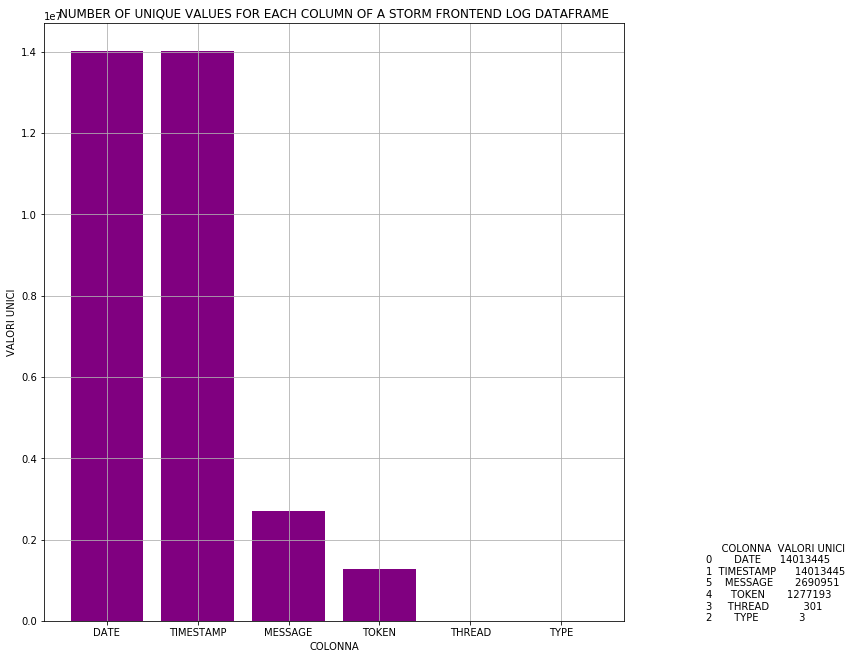

In [16]:
barrer1(unique_count_all(a))

**Example 5**: most_frequent( storm_df, label)
* **Recive** stoRM DataFrame, label str
* **Return** DF with 2 columns, 1st column contains unique values of label column, 2nd contains occurency of each one values

In [17]:
b = most_frequent(a,'THREAD')
display(b)

THREAD OCCURENCIES
0       37     [57157]
1       27     [57092]
2      160     [56837]
3       57     [56821]
4        8     [56715]
5       79     [56709]
6       31     [56685]
7       89     [56632]
8       15     [56601]
9       43     [56587]
10      53     [56578]
11      72     [56556]
12      32     [56536]
13      49     [56533]
14      73     [56518]
15      70     [56477]
16      58     [56475]
17     110     [56466]
18     113     [56442]
19       0     [56436]
20     236     [56422]
21       1     [56411]
22      33     [56411]
23      99     [56406]
24       2     [56401]
25     187     [56381]
26      28     [56380]
27       6     [56377]
28     104     [56368]
29      30     [56357]
..     ...         ...
271    200     [55106]
272     91     [55089]
273    226     [55071]
274    191     [55061]
275     80     [55055]
276    282     [55054]
277     90     [55037]
278    222     [55027]
279    141     [55018]
280    296     [55015]
281     44     [55012]
282     50     [55008]
283    277     [55000]
284    260     [54982]
285    225     [54982]
286    220     [54975]
287    179     [54952]
288    129     [54952]
289     93     [54908]
290    244     [54901]
291    285     [54882]
292    267     [54855]
293    254     [54836]
294    205     [54798]
295    135     [54777]
296    249     [54752]
297     92     [54706]
298     74     [54586]
299     65     [54541]
300      -      [2225]

[301 rows x 2 columns]

**Examples 6**  barrer2( 2_dimension_dataframe, legend=False,larg=12,alt=8):
* **Recive** 2 dimension DF form-like unique_values - occurencies
* **Save & Reuturn** bar plot (bins in descending order by occurencies)

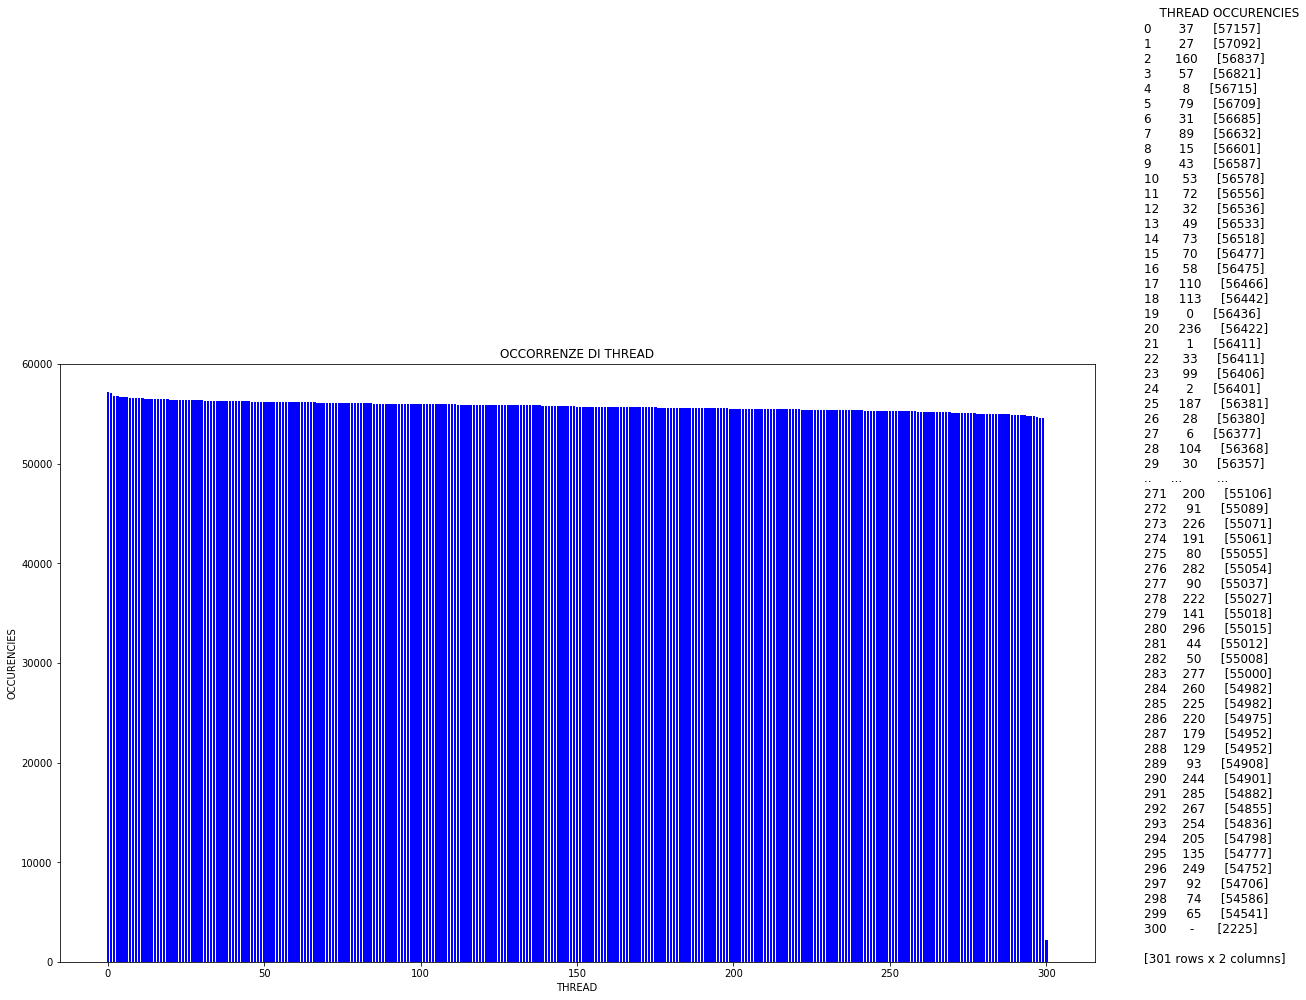

In [18]:
barrer2(b,True,25,11)

**Example 7**: numb_of_for_val_occ(storm_df, label1, label2, N)
* **Recive** storm complete DF, 2 columns labels, N (int) index
* **Return** DF of: taken a value with N index in column label1, return a value(unique)-occurencies dataframe of label2 column values

In [19]:
c = numb_of_for_val_occ(a, 'TOKEN', 'MESSAGE', 0)
display(c)

MESSAGE OCCURENCIES
0   logConfiguration : db.host=storm-atlas.cr.cnaf...        [77]
1    logConfiguration : security.enable.mapping=false        [77]
2                    logConfiguration : db.user=storm        [77]
3     logConfiguration : fe.threadpool.maxpending=200        [77]
4   logConfiguration : proxy.dir=/storage/gpfs_atl...        [77]
5         logConfiguration : fe.gsoap.maxpending=4000        [77]
6         logConfiguration : be.recalltable.port=9998        [77]
7   logConfiguration : security.enable.vomscheck=true        [77]
8              logConfiguration : log.debuglevel=INFO        [77]
9   logConfiguration : log.filename=/var/log/storm...        [77]
10  logConfiguration : Starting StoRM frontend as ...        [77]
11                    logConfiguration : fe.port=8444        [77]
12            logConfiguration : argus-pepd-endpoint=        [77]
13  logConfiguration : fe.threadpool.threads.numbe...        [77]
14        logConfiguration : fe.gsoap.recv_timeout=10        [77]
15  logConfiguration : fe.threadpool.maxpending.sl...        [77]
16         logConfiguration : monitoring.enabled=true        [77]
17        logConfiguration : fe.gsoap.send_timeout=10        [77]
18      logConfiguration : monitoring.timeInterval=60        [77]
19  logConfiguration : xmlrpc endpoint=storm-atlas...        [77]
20  logConfiguration : wsdl.file=/usr/share/wsdl/s...        [77]
21  logConfiguration : ---------------------- Conf...        [77]
22  logConfiguration : ---------------------------...        [77]
23                logConfiguration : proxy.user=storm        [77]
24         logConfiguration : argus.resource-id=storm        [77]
25  logConfiguration : monitoring.filename=monitor...        [77]
26       logConfiguration : monitoring.detailed=false        [77]
27                        initSoap : Mapping disabled        [76]
28      main : StoRM frontend successfully started...        [70]

**Example 8**: barrer3(storm_df, label1, label2, N, larg, alt)
* **Recive**: stoRM DF, label of the 1st column on this value is executed a most frequent values and they are ordered in descening order by occurency, then N select one of this value.
* **Return** DataFrame of values occurency of label2 values connected with storm_df[label1][N]

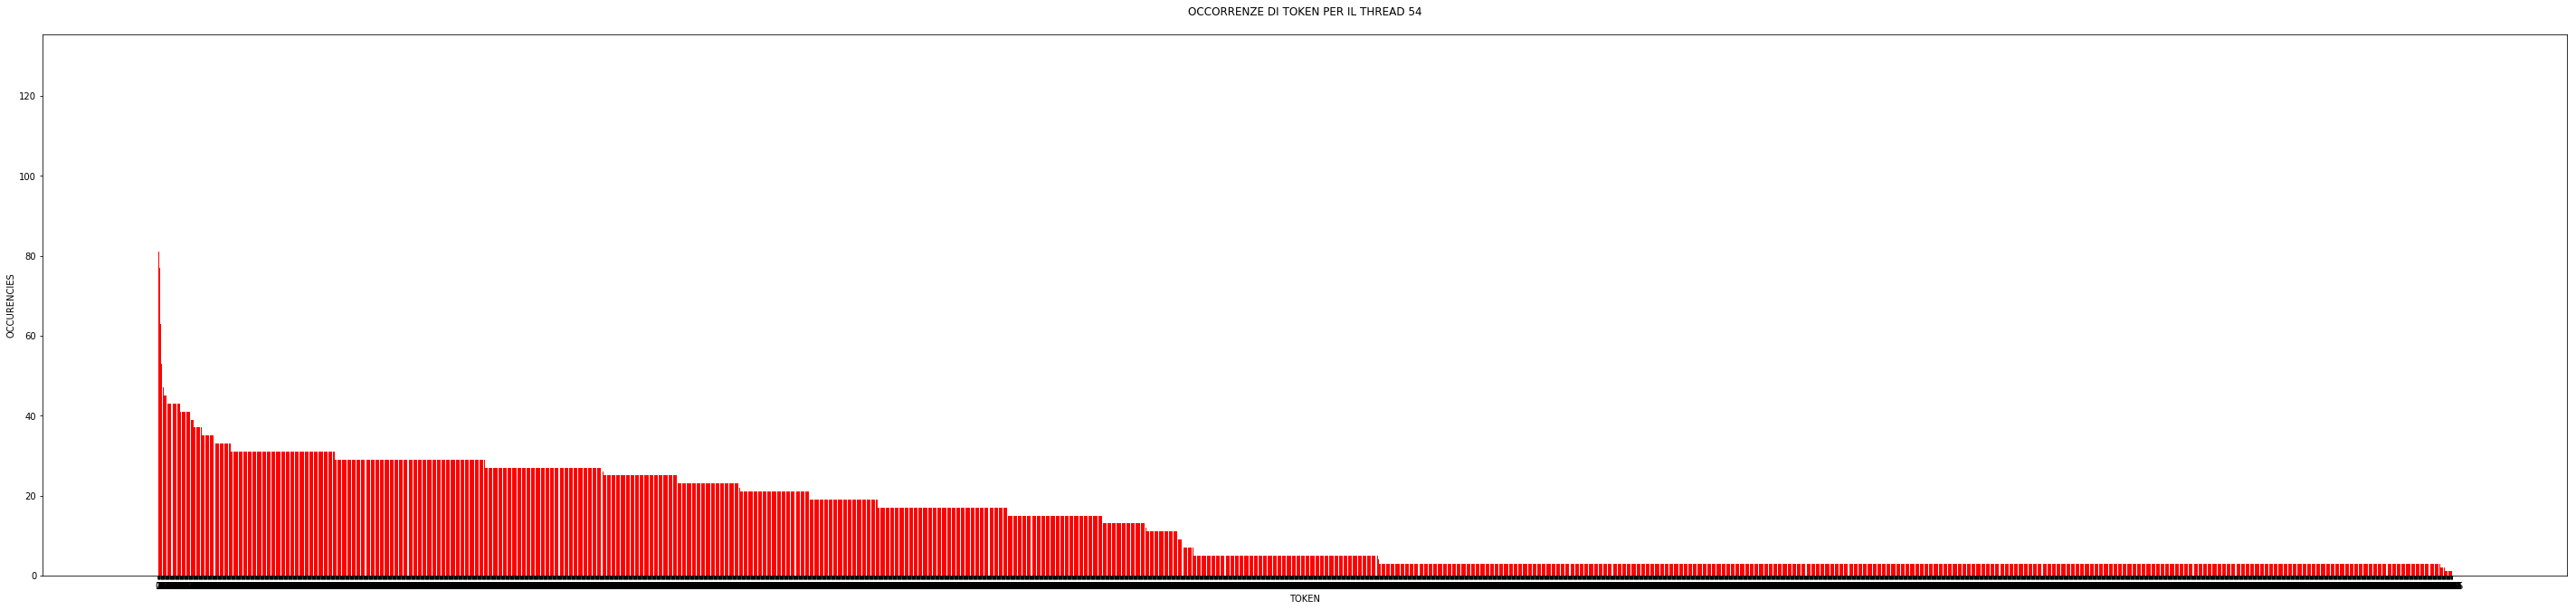

In [20]:
barrer3(a, 'THREAD', 'TOKEN', 0, larg=50,alt=11)

## **-------------------------------------------------------------------------------------------------------------------------**

**Plot B**

Plot B: “numero di messagges per token nel logging di storm”. Il plot A vede un solo token. Discutendo, sembra valga la pena di fare un passo indietro e vedere piu’ token insieme e fare un plot del numero di messaggi per token, vedendo che distribuzione ha. Il problema e’ che in ogni Delta_t che uno guarda nel suo log di riferimento, ci saranno sempre token (processi utente, di fatto) in corso da prima, e token ancora non conclusi, insieme (e indistinguibili da essi) a sequenze di messaggi relativi a token che partono dopo l’inizio del log e finiscono prima della fine del log. <br> Naturalmente vorrei avere solo sequenze di messages del secondo tipo, ma in un sistema in produzione di cui vi vengono dati log “casualmente”, non e’ possibile. Questo plot B potenzialmente avra’ dentro anche durate corte “fake”, legate appunto a quei token che stanno finendo di loggare o stanno iniziando a farlo ma non finiranno entro la fine del log. Si potrebbe fare questo plot B biassato cosi’, e poi farne una seconda versione tentando di prendere SOLO i token la cui lifetime sta nel log interamente. Di certo si riduce di molto il numero di entries (2M) del primo tipo di plot B, ma il secondo tipo di plot B mostra la cosa piu’ interessante, ovvero la distribuzione del numero di messages per token nel logging di storm. 


In [21]:
def most_frequent1(storm_df, label):
    val_freq_df = storm_df[label].value_counts(sort=False).to_frame()
    val_freq_df = pd.DataFrame({label : list(val_freq_df.index), 'OCCURENCIES' : list(val_freq_df.values)},columns=[label,'OCCURENCIES'])
    
    #check for missing value:
    if (reduce(lambda x, y: x+y, val_freq_df['OCCURENCIES']) != len(storm_df[label])):
        print "SOMETHING GONE WRONG" 
        
    return val_freq_df

In [22]:
def plotter(DF):
    fig = plt.figure(figsize=(500,14))
    plt.suptitle("messaggi per token".upper())
    plt.plot(DF['TOKEN'],DF['OCCURENCIES'],'r-')
    plt.xticks(range(len(DF['TOKEN'])),list(DF['TOKEN']),rotation=-30)
    #plt.grid()
    plt.show()
    plt.savefig('testplot.jpg',figsize=(500, 14),dpi=600)

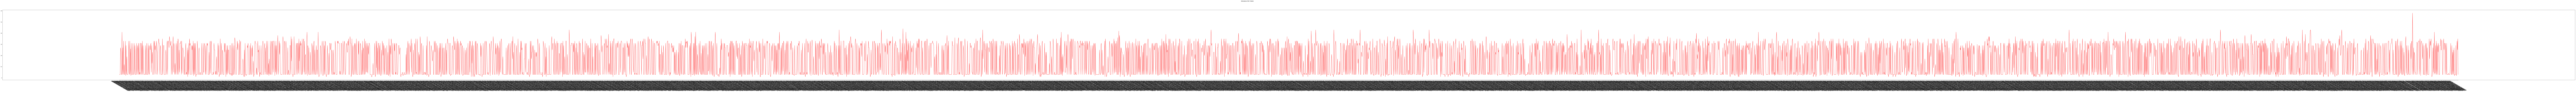

<Figure size 432x288 with 0 Axes>

In [23]:
plotter(most_frequent1(a.head(100000),'TOKEN')) #NB non lo fare per il log intero

Considerazioni sul plot B:
* utilità dubbia
* visibiità orrenda
* mi sembra che dica una cosa forse significativa, poichè i thread le voci sono selezionate in ordine di tempo e sono poi contati tutti i messagi associati in quella frazione del log, alcuni che magari iniziano nello stesso tempo si sviluppano poi diversamente, cioè occorrono ppiù volte di quello immediatamente dificanco che magari occorre una sola volta.

### Plot B alternative

Vorrei fare uno scatter, ovvero un plot a scatter dove per ogni token abbiamo su un asse la fdifferenza fra il  tempo in cui inizia e finisce (primo e ultimo valore) e sull'altro asse invece il numero di messaggi, quindi di occorrenze associate a quel token.

## Plot D: guardare alcune cose dei warn, cioè fare un po di grafici sui warn

## **---------------------------------------------------------------------------------------------------------------------------**

# <span style="color:yellow"> **DA QUI IN POI È FRITTO MISTO** </span>

## <span style="color:red"> FREQUENZA DI TIPI (1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'TYPE')[:].head(20),True) #Togliere hashing per visualizzare tutto

## <span style="color:red"> FREQUENZA DI MESSAGE (HEAD, 1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'MESSAGE')[1:],True)

## <span style="color:red"> FREQUENZA DI MESSAGE (TAIL, 1DAYLOG) </span>

In [ ]:
barrer2(most_frequent(a,'MESSAGE').tail(20),True)

## <span style="color:red"> FREQUENZA DI THREAD (TOTALE, 1DAYLOG) </span> Fare con quello intermedio


In [ ]:
barrer2(d,True)

<span style="color:red"> THREAD </span> sembra che ci siano in totale 301 thread assegnati alle istanze di stoRM (per atlas?) l'andamento è significativo perchè ci mostra che una giornata più o meno i thread ricoronno tutti lo stesso numero di volte con una differenza del 2% circa tra l'occorrenza minore e la maggiore. 
IPOTESI: Questo può significare che la macchina cerca sempre di distribuire le operazioni tra tutti i thread disponibili.

## <span style="color:red"> FREQUENZA DI TOKEN (HEAD(50), 1DAYLOG) </span> Anche per log intermedio


In [ ]:
barrer2(most_frequent(a,'TOKEN').head(50),True)

## <span style="color:red"> FREQUENZA DI TOKEN (TAIL, 1DAYLOG) </span>


In [ ]:
barrer2(most_frequent(a,'TOKEN').head(20),True)

##  <span style="color:red"> Valori unici per ogni colonna </span> <br> NB:DA FARE ANCHE PER ORA per thread e token

In [ ]:
barrer1(b[:])

In [ ]:
WARNS_OCC = numb_of_for_val_occ(a,'TOKEN','MESSAGE',1)

## <span style="color:red"> FREQUENZA DEI MESSAGE PER I 5 TOKEN PIÙ FREQUENTI </span>


In [ ]:
MESSAGE_FOR_TOKEN = numb_of_for_val_occ(a,'TYPE','TOKEN',2)
barrer3(MESSAGE_FOR_TOKEN,True)

## <span style="color:red"> FREQUENZA DEI TOKEN PER I 5 THREAD PIÙ FREQUENTI </span>


In [ ]:
for i in range(5):
    TOKEN_FOR_THREAD = numb_of_for_val_occ(a,'THREAD','TOKEN',i)
    barrer3(TOKEN_FOR_THREAD,True)

## <span style="color:red"> FREQUENZA DEI THREAD PER I 5 TOKEN PIÙ FREQUENTI </span>


In [ ]:
for i in range(5):
    THREAD_FOR_TOKEN = numb_of_for_val_occ(a,'TOKEN','THREAD',i)
    barrer3(THREAD_FOR_TOKEN,True)

In [ ]:
MESSAGE_FOR_TOKEN = numb_of_for_val_occ(a,'TYPE','MESSAGE',2)
barrer3(MESSAGE_FOR_TOKEN,True)

#### <span style='color:red'> TOKEN ASSOCIATI A WARN + PRODUZIONE .CSV SPECIFICI </span>

In [19]:
def barrera(storm_df, label1, label2, fout):
    
    selected = ['WARN','ERROR']
    selection_df = storm_df.loc[storm_df[label1].isin(selected)]
    selection_df.to_csv(fout + '_' + label1 + '_selected.csv')
    
    labels = []
    for label in list(selection_df):
        labels.append(label)
    print labels

In [20]:
barrera(a,'TYPE','TOKEN','TEST')

['DATE', 'TIMESTAMP', 'TYPE', 'THREAD', 'TOKEN', 'MESSAGE']
